In [113]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df=pd.read_csv('../data/titanic.csv')

In [115]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Расшифровка значений
PassengerId - Идентификационный номер пассажира<br>
Survived - 1 - пассажир пережил катастрофу, 0 - пассажир не пережил катастрофу<br>
Pclass - класс обслуживания пассажира
Name - Имя, Фамилия и титул пассажира<br>
Sex - Пол пассажира<br>
Age - Возраст пассажира<br>
SibSp - Количество братьев, сестёр и супругов пассажира на борту<br>
Parch - Количество детей и родителей пассажира на борту<br>
Ticket - Номер билета<br>
Fare - Стоимость купленного билета, фунт<br>
Cabin - Номер каюты<br>
Embarked - Порт посадки<br>

# 2. Предобработка данных

#### Для удобства в последующей работе переведём названия колонок в нижний регистр

In [116]:
df=df.rename(columns=str.lower)

#### Ознакомимся с основной информацией из датасета

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Определим количество отсутвующих значений

In [118]:
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

#### Отсутствует 177 значений в колонке age, 687 значений в колонке cabin и 2 значения в колонке cabin. Для проведения анализа информация о каюте пассажира не играет роли, поэтому данную колонку можно исключить.

In [119]:
df.drop(columns='cabin', inplace=True)

#### Отсутствующие значения в колонке age заменим средним значением возраста пассажиров

In [120]:
df['age'].fillna(df['age'].mean(), inplace=True)

#### Отсутствующие значения в колонке embarked заменим модой по этой колонке

In [121]:
mode_em = stats.mode(df['embarked'])
df['embarked'].replace(np.nan, "mode_em", inplace=True)

/var/folders/q9/h6sdmc_95zbc3my4m52r33xm0000gn/T/ipykernel_80225/1407089464.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_em = stats.mode(df['embarked'])
/Users/toptysh/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/var/folders/q9/h6sdmc_95zbc3my4m52r33xm0000gn/T/ipykernel_80225/1407089464.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFra

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Для удобства последующего анализа заменим значения пола пассажиров на 1 для мужчин и 0 для женщин

In [123]:
df['sex']=df['sex'].map({'male': 1, 'female': 0})

In [161]:
df.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


# 3. Анализ выживаемости среди различных категорий пассажиров

#### Рассчитаем значение корреляции между значениями колонок в датасете

In [162]:
corr=df.corr()
corr

,passengerid,survived,pclass,sex,age,sibsp,parch,fare
passengerid,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658
survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


#### Для удобства восприятия построим тепловую карту полученных значений корреляции

<AxesSubplot:>

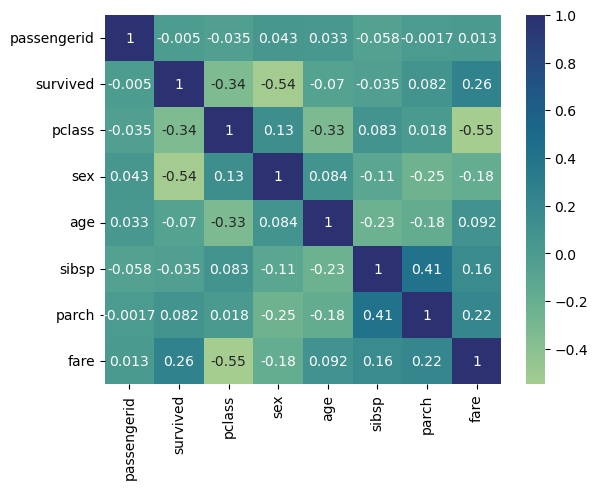

In [336]:
sns.heatmap(corr, annot=True, cmap="crest")

#### В глаза бросается сильная взаимосвязь между полом и выживаемостью пассажиров, изучим данный факт подробнее

## 3.1. Анализ выживаемости пассажиров в зависимости от пола

#### Подсчитаем общее количество мужчин и женщин и количество выживщих пассажиров в каждой группе

In [186]:
passengers_total=df['passengerid'].count()
total_survived=df[df['survived'] == 1]['passengerid'].count()
male_survived=df[(df['sex'] == 1 ) & (df['survived'] == 1)].value_counts().sum()
female_survived=df[(df['sex'] == 0) & (df['survived'] == 1)].value_counts().sum()
male_total=df[df['sex'] == 1].value_counts().sum()
female_total=df[df['sex'] == 0].value_counts().sum()

In [199]:
print('Общее количество пассажиров', passengers_total, 'человек\nCреди них:', male_total, 'мужчин и', female_total, 'женщин',
      '(', round(male_total/passengers_total*100, 2), '%', 'и', round(female_total/passengers_total*100, 2), '% соответственно)')
print('Выжило', male_survived, 'или', round(male_survived/male_total*100, 2), '% мужчин')
print('Выжило', female_survived, 'или', round(female_survived/female_total*100, 2), '% женщин')


Общее количество пассажиров 891 человек
Cреди них: 577 мужчин и 314 женщин ( 64.76 % и 35.24 % соответственно)
Выжило 109 или 18.89 % мужчин
Выжило 233 или 74.2 % женщин


#### График подтверждает расчёты: количество мужчин среди погибших пассажиров значительно превышает количество погибших женщин

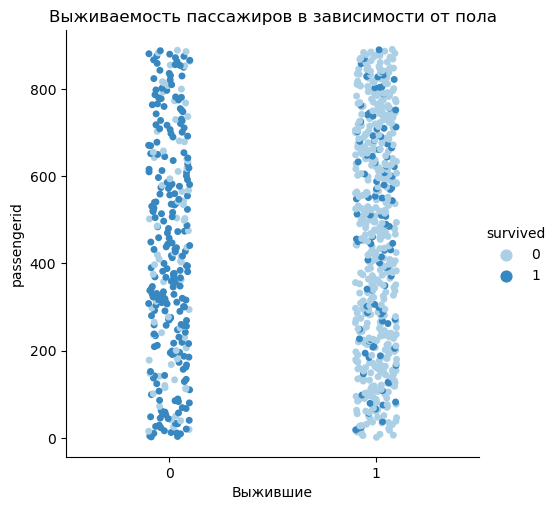

In [345]:
g = sns.catplot(x = 'sex', y = 'passengerid', hue = 'survived', data = df, palette = 'Blues')
g.set_axis_labels('Выжившие')
g.set(title='Выживаемость пассажиров в зависимости от пола')

In [303]:
sex_passengers=df.groupby(['sex', 'survived'])['survived'].count().unstack()
sex_passengers

survived,0,1
sex,,
0,81,233
1,468,109


Text(0, 0.5, 'Количество пассажиров')

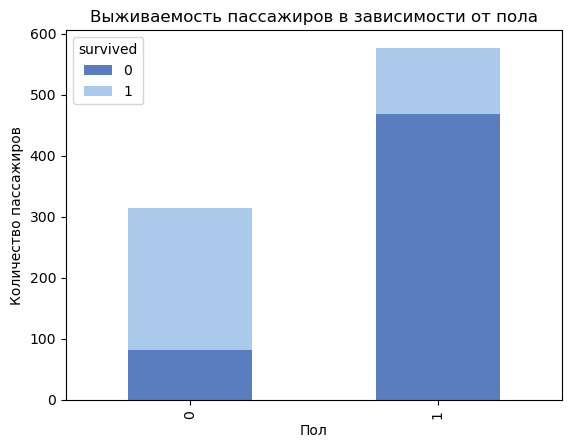

In [317]:
colors = ['#597dbf', '#abc9ea']
ax = sex_passengers.plot.bar(stacked=True, color=colors)
plt.title('Выживаемость пассажиров в зависимости от пола')
ax.set_xlabel('Пол')
ax.set_ylabel('Количество пассажиров')

#### При эвакуации с терпящего крушение корабля в первую очередь спасали женщин и детей. Таким образом, женщины и дети имели большие шансы на выживание, в то время как мужчины оставались на корабле и помогали при проведении эвакуации.

## 3.1. Анализ выживаемости пассажиров в зависимости от класса каюты

#### Следующая по силе взаимосвязь построена между выживанием пассажира и классом его каюты. Подсчитаем количество выживших и погибших пассажиров в каютах каждого класса

In [294]:
pclass_passengers=df.groupby(['pclass', 'survived'])['survived'].count().unstack().T
pclass_passengers

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


In [297]:
pclass_passengers.loc[1,3]

119

In [298]:
print('В каютах 1 класса путешествовало', pclass_passengers[1].sum(),
      'человек, из них выжило', pclass_passengers.loc[1,1], 'или', 
      round(pclass_passengers.loc[1,1]/pclass_passengers[1].sum()*100, 2), '%')
print('В каютах 2 класса путешествовало', pclass_passengers[2].sum(),
      'человек, из них выжило', pclass_passengers.loc[1,2], 'или', 
      round(pclass_passengers.loc[1,1]/pclass_passengers[2].sum()*100, 2), '%')
print('В каютах 3 класса путешествовало', pclass_passengers[3].sum(),
      'человек, из них выжило', pclass_passengers.loc[1,3], 'или', 
      round(pclass_passengers.loc[1,1]/pclass_passengers[3].sum()*100, 2), '%')

В каютах 1 класса путешествовало 216 человек, из них выжило 136 или 62.96 %
В каютах 2 класса путешествовало 184 человек, из них выжило 87 или 73.91 %
В каютах 3 класса путешествовало 491 человек, из них выжило 119 или 27.7 %


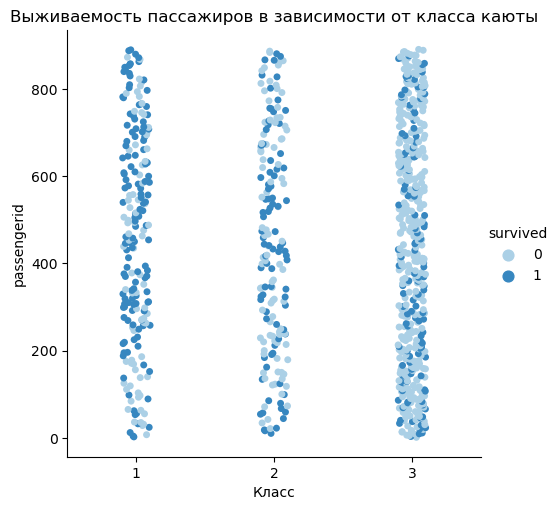

In [343]:
pc = sns.catplot(x = 'pclass', y = 'passengerid', hue = 'survived', data = df, palette = 'Blues')
pc.set_axis_labels('Класс')
pc.set(title='Выживаемость пассажиров в зависимости от класса каюты')

In [300]:
tpclass_passengers=pclass_passengers.T
tpclass_passengers

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Количество пассажиров')

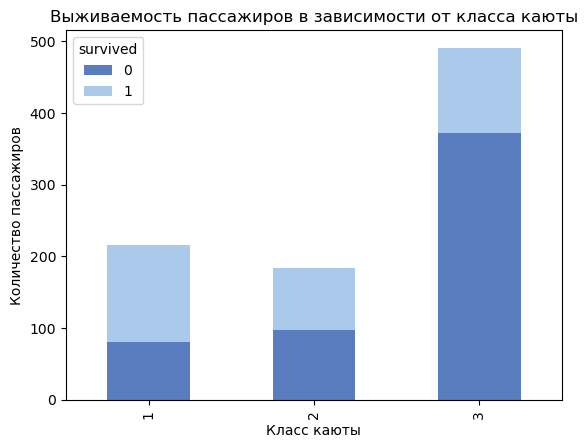

In [318]:
ax2 = tpclass_passengers.plot.bar(stacked=True, color=colors)
plt.title('Выживаемость пассажиров в зависимости от класса каюты')
ax2.set_xlabel('Класс каюты')
ax2.set_ylabel('Количество пассажиров')

#### Причной большого количества жерт среди пассажиров 3-го класса может послужить тот факт, что их каюты распологались вблизи машинного отделения корабля (именно эта часть пострадала сильнее всего при столкновении с айсбергом), также данный вид кают находился в наибольшем отдалении от спасательных шлюпок, расположенных на верхних палубах, в то время как более привелегированные пассажиры 1-го и 2-го класса имели больший приоритет при погрузке в спасательные шлюпки.

## 3.3. Выживаемость пассажиров в зависимости от наличия совместно путешествующих родственников

#### Подсчитаем количество пассажиров путешествующих с супругами / братьями и сестрами и определим процент выживших среди таких пассажиров.

In [329]:
sibsp_passengers=df.groupby(['sibsp', 'survived'])['survived'].count().unstack()
sibsp_passengers['survivors_percent']=round(sibsp_passengers[1]/(sibsp_passengers[0]+sibsp_passengers[1])*100, 2)
sibsp_passengers

survived,0,1,survivors_percent
sibsp,,,
0,398.0,210.0,34.54
1,97.0,112.0,53.59
2,15.0,13.0,46.43
3,12.0,4.0,25.00
4,15.0,3.0,16.67
5,5.0,NaN,NaN
8,7.0,NaN,NaN


#### На основании проведёенных расчетов можно сделать вывод о том, что доля выживших пассажиров, путешествующих с 1 или 2 родственниками выше, чем среди пассажиров путешествующих в одиночку. Однако, при наличии у пассажира более 2 родственников доля выживших резко снижается. Это может быть обусловлено тем, что большая группа людей могла потратить больше времени необходимого для спасения, в то время как небольшие группы действовали более организованно.

/Users/toptysh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/toptysh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


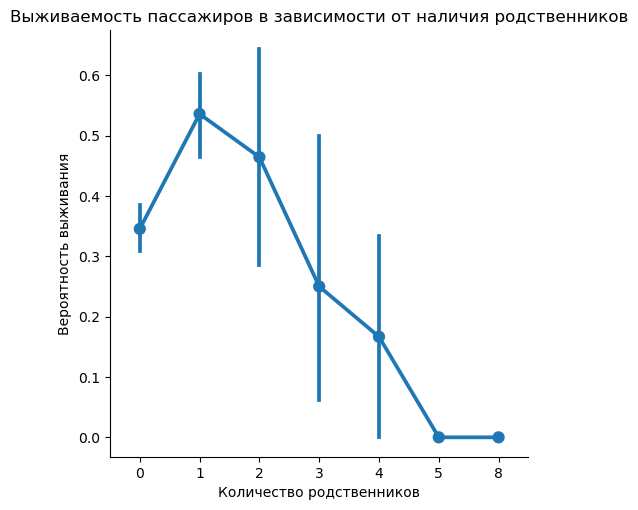

In [334]:
sib = sns.factorplot('sibsp', 'survived', data=df)
sib.set_axis_labels('Количество родственников', 'Вероятность выживания')
sib.set(title='Выживаемость пассажиров в зависимости от наличия родственников')